In [79]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [80]:
# Read .csv
origin_data = pd.read_csv('duct.csv')
# print(origin_data.shape)
# origin_data.head()

In [81]:
# origin_data.info()

In [82]:
# Preprocessing Data

data = pd.DataFrame()

colnames = origin_data.columns # 保存原始列顺序


# 临床资料
data[['malignant','bilateral','height','weight']] = origin_data[['malignant','bilateral','height','weight']]

data['bmi'] = pd.cut(origin_data['bmi'], [0,18.5,24.0,40.0], right=False, labels=[0,1,2]).astype('int64') # 0-18.4=0, 18.5-23.9=1,24-40max=2

data[['diabetes','hypertension','surgery','smoking','family']] = origin_data[['diabetes','hypertension','surgery','smoking','family']]

data['menarche'] = pd.cut(origin_data['menarche'], [0,14,30], right=False, labels=[0,1]).astype('int64') # 0-13 =0, >13 =1

data['miscarriage'] = pd.cut(origin_data['miscarriage'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data[ 'pregnancy'] = pd.cut(origin_data['pregnancy'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data[ 'childbearing'] = pd.cut(origin_data['childbearing'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data['menopause'] = origin_data['menopause']

data[['famhis2','mensperiod','menregular']] = origin_data[['famhis2','mensperiod','menregular']]

data['age'] = pd.cut(origin_data['age'], [0,35,50,100], right=False, labels=[0,1,2]).astype('int64') # 0-34=0, 35-49=1,50-100=2

data['month'] = pd.cut(origin_data['month'], [0,6,350], right=False, labels=[0,1]).astype('int64') # 0-6=0, 6-max=1,6个月为常规风险人群体检周期

# 乳管镜

data['disnature'] = [x if x!=4 else 0 for x in origin_data['disnature']] # 混合性 4 变为 0 

data[['dischange','disnumber']] = origin_data[['dischange','disnumber']]

data[['intraductalmass','position','distance']] = origin_data[['intraductalmass','position','distance']]

data[['shape','surface','status','quantity','distribution']] = origin_data[['shape','surface','status','quantity','distribution']]

data[['appearance','retraction']] = origin_data[['appearance','retraction']]

# 超声表现

data[['ductectasia','numintramass','numcysmass','nummass']] = origin_data[['ductectasia','numintramass','numcysmass','nummass']]

data[['ussize','usposition','usdistance','usshape','usboundary']] = origin_data[['ussize','usposition','usdistance','usshape','usboundary']] # 有怀疑的，按着分级最高，最怀疑的肿物来的。不怀疑的，是按着最大的来的。

data[['bloodflow','calcification','birads']] = origin_data[['bloodflow','calcification','birads']]

data['bloodflow2'] = origin_data['bloodflow2'] # 拟删除列

data = data[colnames] # 原始列顺序

data.drop(['famhis2','bloodflow2'], axis=1, inplace=True) # 删除无意义列

data.drop(['height','weight'], axis=1, inplace=True) # 身高体重单独分析临床意义不足

data.drop(['mensperiod'], axis=1, inplace=True) # 每次月经的长短暂无理论根据

data.drop(['menregular'], axis=1, inplace=True) # 月经是否规律暂无标准

print(data.shape)

data.head(20)

(355, 40)


,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,menarche,menopause,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads
0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,1
1,1,1,1,1,1,0,1,1,0,0,1,0,2,2,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,1
2,1,0,2,0,2,0,0,0,1,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,2
3,1,0,1,1,2,0,0,0,0,0,1,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,2,0,2,1,1,0,0,0,0,1,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,2
5,1,0,2,0,1,0,1,0,0,0,1,1,2,2,2,1,0,0,1,4,1,1,1,0,1,1,0,1,0,0,0,1,3,4,2,2,2,1,1,2
6,1,0,2,0,2,0,0,0,1,0,1,1,1,2,1,1,0,1,1,6,1,2,2,0,2,2,0,0,1,0,0,1,2,4,1,2,1,2,1,2
7,1,0,1,1,2,0,1,0,0,0,1,0,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,1,1,1,1,1,0,1
8,1,0,1,0,2,0,0,0,0,1,0,0,0,1,1,2,0,1,1,2,1,1,1,0,1,1,0,0,1,0,2,2,2,5,1,1,1,1,0,1
9,1,0,2,0,2,0,0,0,0,0,1,1,2,2,1,1,0,0,1,1,2,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1


In [83]:
# data.info()

In [84]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85, session_id=1)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 40)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,39
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [85]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.817200,0.000000,0.506900,0.748200,0.595200,0.484000
1,Extra Trees Classifier,0.817100,0.762000,0.480600,0.765800,0.573300,0.469100
2,Linear Discriminant Analysis,0.810500,0.748000,0.506900,0.729800,0.589700,0.471800
3,Logistic Regression,0.807100,0.745600,0.493100,0.725400,0.578600,0.459300
4,Light Gradient Boosting Machine,0.800600,0.754200,0.494400,0.715000,0.566500,0.444500
5,Random Forest Classifier,0.797200,0.780800,0.381900,0.749800,0.497800,0.388700
6,Extreme Gradient Boosting,0.794000,0.733800,0.433300,0.718700,0.522100,0.404600
7,CatBoost Classifier,0.794000,0.786400,0.408300,0.703100,0.499900,0.387300
8,Gradient Boosting Classifier,0.790500,0.760900,0.469400,0.685300,0.536800,0.411500
9,Ada Boost Classifier,0.780400,0.717700,0.455600,0.652500,0.527400,0.390200


In [86]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8065,0.7273,0.3333,1.0000,0.5000,0.4151
1,0.7667,0.7784,0.2500,0.6667,0.3636,0.2553
2,0.8667,0.8125,0.7500,0.7500,0.7500,0.6591
3,0.8333,0.7216,0.6250,0.7143,0.6667,0.5562
4,0.7333,0.8011,0.2500,0.5000,0.3333,0.1892
5,0.7667,0.7841,0.2500,0.6667,0.3636,0.2553
6,0.8667,0.9091,0.6250,0.8333,0.7143,0.6296
7,0.7333,0.7670,0.2500,0.5000,0.3333,0.1892
8,0.8667,0.9773,0.5000,1.0000,0.6667,0.5946
9,0.7000,0.5852,0.2500,0.4000,0.3077,0.1290


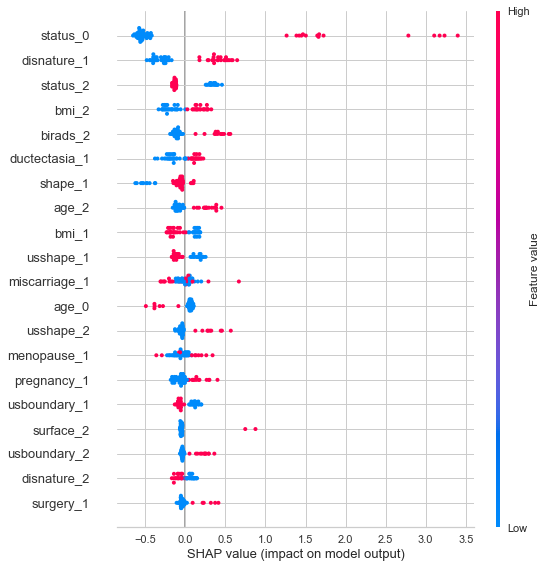

In [87]:
interpret_model(catboost)

In [88]:
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7963,0.8393,0.4,0.75,0.5217,0.4072


In [89]:
from pycaret.clustering import *
clusterdata = setup(data, normalize = True, session_id=1)


Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Original Data,"(355, 40)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,40
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(355, 112)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [90]:
kmeans = create_model('kmeans', num_clusters = 5)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)


In [91]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,...,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads,Cluster
0,1,0,0,1,2,0,0,0,0,0,...,1,3,2,1,2,1,1,0,1,Cluster 4
1,1,1,1,1,1,0,1,1,0,0,...,2,1,1,1,1,1,1,0,1,Cluster 3
2,1,0,2,0,2,0,0,0,1,0,...,2,3,1,1,2,2,2,0,2,Cluster 2
3,1,0,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 1
4,1,0,2,0,2,1,1,0,0,0,...,2,1,5,1,1,1,1,0,2,Cluster 0


In [92]:
plot_model(kmeans)

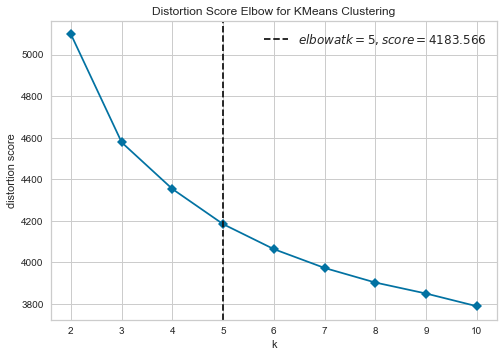

In [93]:
plot_model(kmeans, plot = 'elbow')

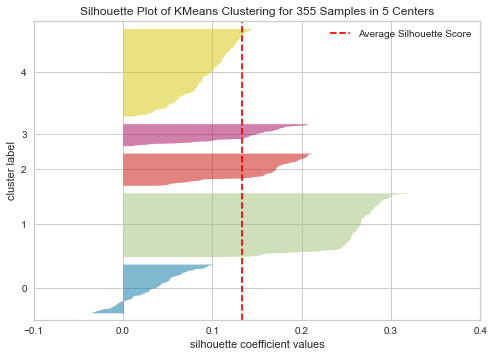

In [94]:
plot_model(kmeans, plot = 'silhouette')

In [95]:
plot_model(kmeans, plot = 'distribution')

In [96]:
plot_model(kmeans, plot = 'distribution', feature = 'malignant')

In [97]:
data.columns

Index(['malignant', 'bilateral', 'age', 'month', 'bmi', 'diabetes',
       'hypertension', 'surgery', 'smoking', 'family', 'menarche', 'menopause',
       'miscarriage', 'pregnancy', 'childbearing', 'disnature', 'dischange',
       'disnumber', 'intraductalmass', 'position', 'distance', 'shape',
       'surface', 'status', 'quantity', 'distribution', 'retraction',
       'appearance', 'ductectasia', 'numintramass', 'numcysmass', 'nummass',
       'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary',
       'bloodflow', 'calcification', 'birads'],
      dtype='object')

In [98]:
kerasdata = pd.DataFrame()

kerasdata['malignant'] = data['malignant']
    
kerasdata[['bilateral','diabetes','hypertension']] = data[['bilateral','diabetes','hypertension']]

kerasdata[['surgery', 'smoking', 'family','menopause']] = data[['surgery', 'smoking', 'family','menopause']]
                              
kerasdata[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification']] = data[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification']]
                              
classname = ['bmi','menarche','miscarriage','pregnancy','childbearing','disnature', 'position',  'shape', 'surface', 'status', 'quantity',  'appearance', 'numintramass', 'numcysmass', 
             'nummass', 'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary', 'bloodflow', 'birads']

In [99]:
for colname in data.columns:
    if colname not in classname:
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)
kerasdata

,malignant,bilateral,diabetes,hypertension,surgery,smoking,family,menopause,dischange,disnumber,...,distance-2,distribution-0,distribution-1,distribution-2,retraction-0,retraction-1,ductectasia-0,ductectasia-1,calcification-0,calcification-1
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,1,1,0,1,1,0,0,0,0,1,...,1,0,0,1,1,0,0,1,1,0
2,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
351,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
352,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
353,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 1
testsize = 0.3
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [136]:
X_train.shape

(248, 52)

In [137]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(28,activation = 'relu',input_shape=(52,)))
model.add(layers.Dense(28,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 28)                1484      
_________________________________________________________________
dense_20 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 29        
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 50,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 198 samples, validate on 50 samples
Epoch 1/50
198/198 [==============================] - 0s 740us/step - loss: 0.9473 - accuracy: 0.2727 - val_loss: 0.7026 - val_accuracy: 0.5200
Epoch 2/50
198/198 [==============================] - 0s 50us/step - loss: 0.7644 - accuracy: 0.4242 - val_loss: 0.6041 - val_accuracy: 0.7000
Epoch 3/50
198/198 [==============================] - 0s 45us/step - loss: 0.6385 - accuracy: 0.6263 - val_loss: 0.5471 - val_accuracy: 0.7600
Epoch 4/50
198/198 [==============================] - 0s 45us/step - loss: 0.5608 - accuracy: 0.7576 - val_loss: 0.5233 - val_accuracy: 0.7600
Epoch 5/50
198/198 [==============================] - 0s 56us/step - loss: 0.5158 - accuracy: 0.7525 - val_loss: 0.5171 - val_accuracy: 0.7000
Epoch 6/50
198/198 [==============================] - 0s 55us/step - loss: 0.4945 - accuracy: 0.7525 - val_loss: 0.5171 - val_accuracy: 0.6600
Epoch 7/50
198/198 [==============================] - 0s 40us/step - loss: 0.4790 - accuracy: 0.

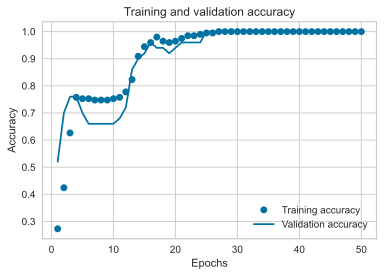

In [139]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [140]:
y_pred = model.predict_classes(X_test)

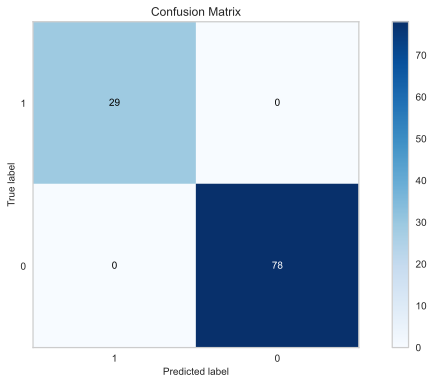

In [141]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));